# Data pre-processing for Climate Spirals Visualisation

In [1]:
%matplotlib inline
import pandas as pd
from pandas_datapackage_reader import read_datapackage
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")

## CO<sub>2</sub> emissions from the Global Carbon Budget


Historical CO<sub>2</sub> emissions are taken from the [Global Carbon Budget](https://www.globalcarbonproject.org/carbonbudget/20/data.htm). After downloading the Excel file we can read it in:

In [2]:
gcb = pd.read_excel(
    'Global_Carbon_Budget_2020v1.0.xlsx',
    sheet_name="Historical Budget",
    skiprows=15,
    index_col="Year",
    usecols="A:H"
)
gcb = gcb.rename(columns={
    "fossil emissions excluding carbonation": "Fossil-Fuel-Industry",
    "land-use change emissions": "Land-Use-Change"
})
gcb.head()

,Fossil-Fuel-Industry,Land-Use-Change,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
Year,,,,,,,
1750,0.002552,NaN,-0.077592,NaN,0.173773,NaN,NaN
1751,0.002552,NaN,-0.073988,NaN,-0.452640,NaN,NaN
1752,0.002553,NaN,-0.070596,NaN,-0.280658,NaN,NaN
1753,0.002553,NaN,-0.067628,NaN,-0.023358,NaN,NaN
1754,0.002554,NaN,-0.064024,NaN,-0.136870,NaN,NaN


In [3]:
gcb.tail()

,Fossil-Fuel-Industry,Land-Use-Change,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
Year,,,,,,,
2019,9.945622,1.802637,5.42682,2.625991,3.13698,0.215298,0.343171
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020*,~9.3,~1.6,~5.3,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"*2020 values are based on proxies and on projections for the most recent months, not based on actual emission data. See Friedlingstein et al. 2020 for methodology",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
gcb = gcb.dropna(how="all")

gcb = gcb.rename(index={"2020*": 2020})
gcb.loc[2020] = gcb.loc[2020].str.replace("~", "")
gcb = gcb.astype(float)


In [5]:
gcb

,Fossil-Fuel-Industry,Land-Use-Change,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
Year,,,,,,,
1750,0.002552,NaN,-0.077592,NaN,0.173773,NaN,NaN
1751,0.002552,NaN,-0.073988,NaN,-0.452640,NaN,NaN
1752,0.002553,NaN,-0.070596,NaN,-0.280658,NaN,NaN
1753,0.002553,NaN,-0.067628,NaN,-0.023358,NaN,NaN
1754,0.002554,NaN,-0.064024,NaN,-0.136870,NaN,NaN
...,...,...,...,...,...,...,...
2016,9.613000,1.555205,6.074640,2.683507,3.183434,0.199106,-0.972483
2017,9.742000,1.521109,4.577220,2.519991,3.829413,0.203694,0.132791
2018,9.940000,1.553637,5.086980,2.561091,3.776513,0.210856,-0.141803


Converting to GtCO2 from GtC

In [6]:
co2 = (gcb[["Fossil-Fuel-Industry", "Land-Use-Change"]].loc[1850:] * 3.66 )
co2.tail()

,Fossil-Fuel-Industry,Land-Use-Change
Year,,
2016,35.183580,5.692049
2017,35.655720,5.567260
2018,36.380400,5.686311
2019,36.400977,6.597651
2020,34.038000,5.856000


In [7]:
co2["Total"] = co2[["Fossil-Fuel-Industry", "Land-Use-Change"]].sum(axis=1)

In [8]:
co2.tail()

,Fossil-Fuel-Industry,Land-Use-Change,Total
Year,,,
2016,35.183580,5.692049,40.875629
2017,35.655720,5.567260,41.222980
2018,36.380400,5.686311,42.066711
2019,36.400977,6.597651,42.998629
2020,34.038000,5.856000,39.894000


array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>], dtype=object)

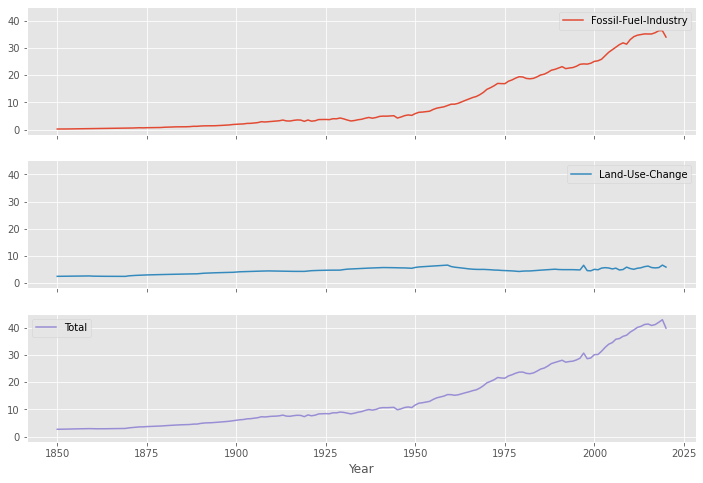

In [9]:
co2.plot(subplots=True, sharey=True, figsize=(12,8))

Export for visualisation

In [10]:
export = pd.DataFrame({"value": co2["Total"]})
export.index.name = "year"

In [11]:
export.reset_index().to_csv("../public/emissions.csv", index=False, float_format='%g')
export.tail()

,value
year,
2016,40.875629
2017,41.222980
2018,42.066711
2019,42.998629
2020,39.894000


In [12]:
co2.loc[:2019].Total.sum()

2408.005837404804

## CO<sub>2</sub> concentrations

CO<sub>2</sub> concentrations are taken from the [CMIP6 concentration dataset](http://www.climate-energy-college.net/cmip6), version from 1 July 2016, combined with data from [ESRL/NOAA](https://www.esrl.noaa.gov/gmd/ccgg/trends/gl_data.html).


In [13]:
noaa = pd.read_csv("co2_mm_gl.txt", comment="#", parse_dates=[[0, 1]], index_col=[0], delim_whitespace=True, header=None,
                  names=["year", "month", "decimal", "average", "trend"])

noaa.head()

,decimal,average,trend
year_month,,,
1980-01-01,1980.042,338.55,337.93
1980-02-01,1980.125,339.27,338.22
1980-03-01,1980.208,339.60,338.25
1980-04-01,1980.292,340.00,338.37
1980-05-01,1980.375,340.43,338.90


In [14]:
cmip6 = pd.read_csv(
    "mole_fraction_of_carbon_dioxide_in_air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-1-0_gr3-GMNHSH_000001-201412.csv",
)
cmip6.index = (cmip6.year.astype(str).apply(lambda x: x.zfill(4)) + 
    "-" + 
   cmip6.month.astype(str).apply(lambda x: x.zfill(2)) +
    "-01"
)
cmip6 = cmip6.iloc[21000:]
cmip6.index = pd.to_datetime(cmip6.index)
cmip6 = cmip6.drop(['datenum', 'datetime', 'day'], axis=1)
cmip6.head()

,year,month,data_mean_global,data_mean_nh,data_mean_sh
1750-01-01,1750,1,277.813529,278.492749,277.134309
1750-02-01,1750,2,278.196558,279.148898,277.244218
1750-03-01,1750,3,278.538475,279.791418,277.285531
1750-04-01,1750,4,278.779124,280.326118,277.232131
1750-05-01,1750,5,278.723560,280.230610,277.216510


<AxesSubplot:xlabel='year_month'>

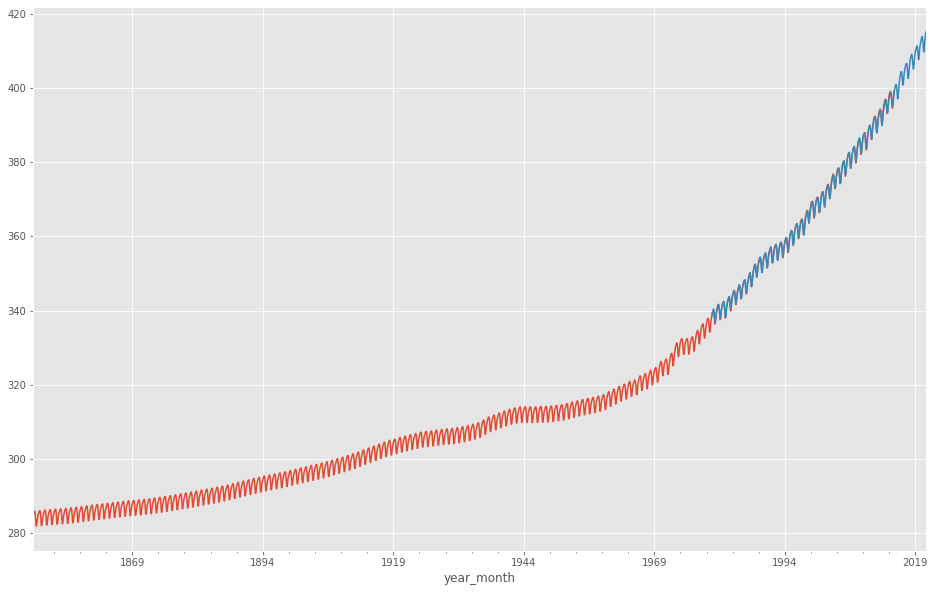

In [15]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
cmip6.loc["1850":]["data_mean_global"].plot(ax=ax)
noaa["average"].plot(ax=ax)

In [16]:
cmip6.loc["1850":].rename(columns={"data_mean_nh": "value"}).to_csv("../public/concentrations_nh.csv", index=False)
cmip6.loc["1850":].rename(columns={"data_mean_sh": "value"}).to_csv("../public/concentrations_sh.csv", index=False)

combined = pd.concat([cmip6["data_mean_global"].loc["1850":"1979-12"], noaa["average"]])
combined = pd.DataFrame({"value": combined})
combined["year"] = combined.index.year
combined["month"] = combined.index.month
combined.index.name = "date"
combined["day"] = 15
combined = combined[["year", "month", "value"]]
combined.to_csv("../public/concentrations.csv", index=False)


In [17]:
combined.tail()

,year,month,value
date,,,
2020-09-01,2020,9,410.06
2020-10-01,2020,10,411.71
2020-11-01,2020,11,413.26
2020-12-01,2020,12,414.20
2021-01-01,2021,1,415.13


## Global Temperatures

Global temperature data is taken from the HadCRUT4 near surface temperature dataset.

http://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/download.html

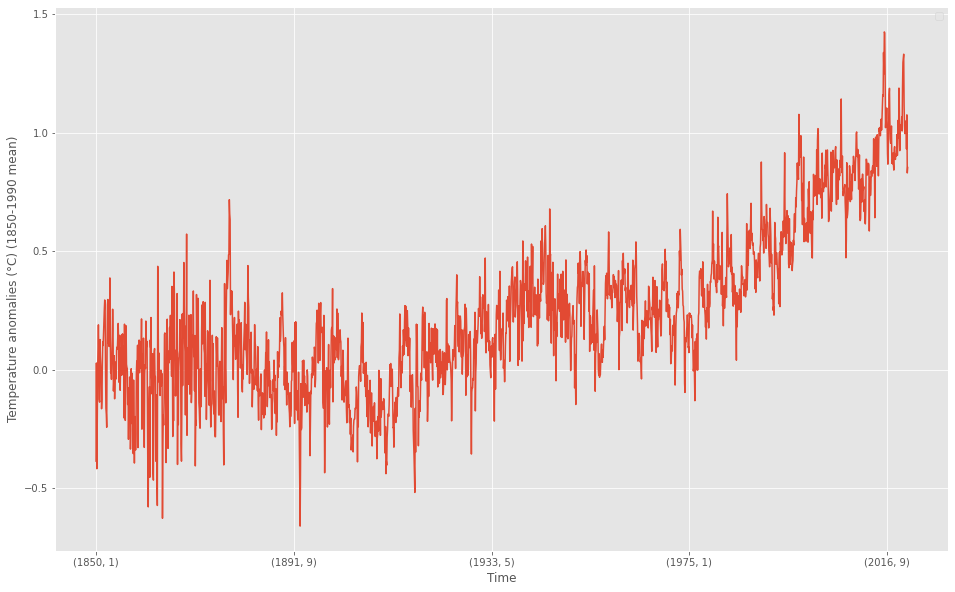

In [18]:
hadcrut = pd.read_csv(
    "HadCRUT.4.6.0.0.monthly_ns_avg.txt",
    delim_whitespace=True,
    usecols=[0, 1],
    header=None
)
hadcrut['year'] = hadcrut.iloc[:, 0].apply(lambda x: x.split("/")[0]).astype(int)
hadcrut['month'] = hadcrut.iloc[:, 0].apply(lambda x: x.split("/")[1]).astype(int)

hadcrut = hadcrut.rename(columns={1: "value"})
hadcrut = hadcrut.iloc[:, 1:]


hadcrut = hadcrut.set_index(['year', 'month'])

hadcrut -= hadcrut.loc[1850:1900].mean()
hadcrut.plot(figsize=(16,10))
hadcrut = hadcrut.reset_index()
plt.xlabel("Time")
plt.ylabel(u"Temperature anomalies (°C) (1850-1990 mean)")
plt.legend("")

In [19]:
hadcrut.tail()

,year,month,value
2048,2020,9,1.027441
2049,2020,10,0.930441
2050,2020,11,1.074441
2051,2020,12,0.829441
2052,2021,1,0.852441


In [20]:
hadcrut.to_csv("../public/temperatures.csv", index=False)